## Signzy Hiring Challenge

### Web Scraper for Sound Cloud

In the following program we wil attempt to scrape some songs from some playlists on soundcloud and we will attempt to gather some valuable insights from the data we gather. 

The Library SoundCloud lets us easily gather data from soundcloud.Since, Soundcloud does not provide ClientID's from along time. I have used a public Soundcloud Client_ID. 

In [90]:
import soundcloud
all_tracks=list()

In [95]:
playlists=["2019-playlist","sunday-morning-kisses-and","best-of-mrrevillz","jtdymaxcglb5","midnight-lofi","bestofchillcity","bestofmrsuicidesheep"
          ,"bestofkoalakontrol","deephousehits"]
len(playlists)

9

In [92]:
client=soundcloud.Client(client_id="FweeGBOOEOYJWLJN3oEyToGLKhmSz0I7")
for i in playlists:
    play_data=client.get("playlists/"+i)
    for j in play_data.tracks:
        all_tracks.append(j)

In [93]:
len(all_tracks)

430

In [109]:
for i in all_tracks:
    j=i['user']['id']
    data=client.get("users/"+str(j))
    i['creatr_follower_count']=data.followers_count
    i['creatr_country']=data.country
    i['creatr_following_count']=data.followings_count
    i['creatr_city']=data.city

Now we have gathered the tracks of data from 9 playlists(430 Songs).
We will now clean the data and try to gather some valuable insights from it.

In [110]:
import pandas as pd
Df=pd.DataFrame(all_tracks)

Pandas is a python library built on Numpy which helps us store the data in tablar way and hence it also makes making computations on the data easier.

we've made this data into a dataframe which consists of the folwing columns.

In [150]:
Df.columns


Index(['artwork_url', 'attachments_uri', 'available_country_codes', 'bpm',
       'comment_count', 'commentable', 'created_at', 'creatr_city',
       'creatr_country', 'creatr_follower_count', 'creatr_following_count',
       'description', 'download_count', 'download_url', 'downloadable',
       'duration', 'embeddable_by', 'favoritings_count', 'genre', 'id', 'isrc',
       'key_signature', 'kind', 'label', 'label_id', 'label_name',
       'last_modified', 'license', 'likes_count', 'monetization_model',
       'original_content_size', 'original_format', 'permalink',
       'permalink_url', 'playback_count', 'policy', 'purchase_title',
       'purchase_url', 'release', 'release_day', 'release_month',
       'release_year', 'reposts_count', 'sharing', 'state', 'stream_url',
       'streamable', 'tag_list', 'title', 'track_type', 'uri', 'user',
       'user_id', 'video_url', 'waveform_url'],
      dtype='object')

The columns which contain the basic data about the songs are:-

Bpm<br>
comment_count<br>
download_count<br>
duration<br>
favouritings_count<br>
genre<br>
likes_count<br>
playback_count<br>
release_month<br>
release_year<br>
release_day<br>
reposts_count<br>
creatr_country<br>
creatr_follower_count<br>
creatr_folllowing_count<br>
creatr_city<br>

Now we shall make aslice of the dataframe which contains the basic data aboutthe songs

In [182]:
Data=Df[['bpm','comment_count','download_count','duration','favoritings_count','genre','likes_count','playback_count','release_month',
       'release_year','creatr_country','creatr_follower_count','creatr_following_count','creatr_city','release_day','reposts_count']]

In [183]:
Data.isnull().sum()

bpm                       429
comment_count               3
download_count              3
duration                    0
favoritings_count           3
genre                       3
likes_count                 3
playback_count              3
release_month             339
release_year              339
creatr_country            190
creatr_follower_count       0
creatr_following_count      0
creatr_city                48
release_day               339
reposts_count               3
dtype: int64

Here We see that most of the values in the bpm,release_month and release_year columns are null

In [184]:
#Dropping the bpm column as it would provide us no valuable insight
#Data=Data.drop('bpm',axis=1)
Data=Data.fillna(0)

Let's Start to perform analysis and try to gather some insights on the data we have.

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

Seaborn and matplotlib are the plotting libraries majorly used in python.<br>
These libraries help us plot various kinds of plots.

Let's Try to see the distribution of likes aout the data.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


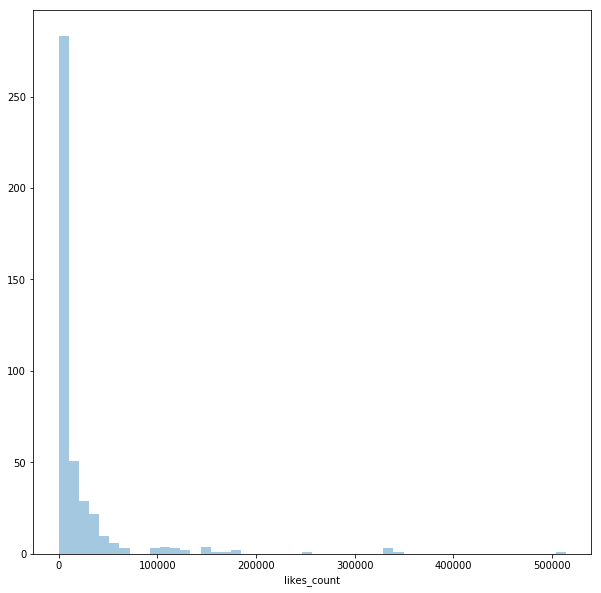

In [186]:
plt.figure(figsize=(10,10))
sns.distplot(Data['likes_count'],kde=False)
plt.show()

Here, We see that most of our data lies between 0 to 1,00,000 likes.<br>
which makes sense as there are literally a few songs which can gather more than 100000 likes.<br><br>
Let's Now try to see tha distribution of comments about the data

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


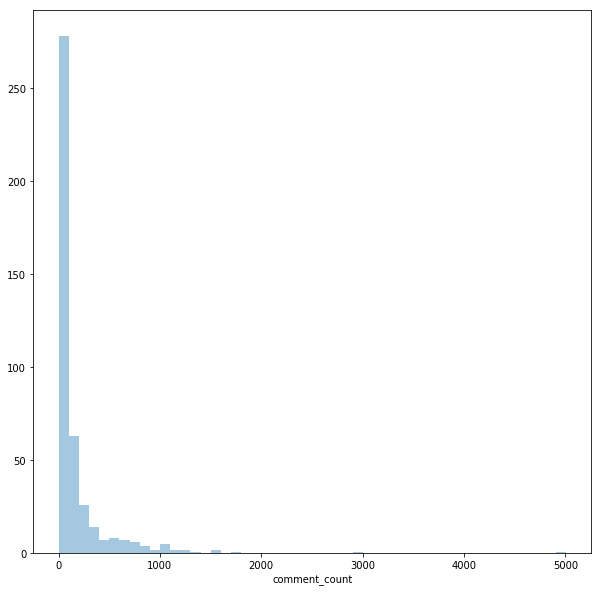

In [187]:
plt.figure(figsize=(10,10))
sns.distplot(Data['comment_count'],kde=False)
plt.show()

Again, We notice the same kind of distribution we saw in the likes about the data.<br>
this reinforces our insight that the number of songs in pur data which are very famous are very low.

Let's Try to see if the number of likes depend on the country the track was created in?

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


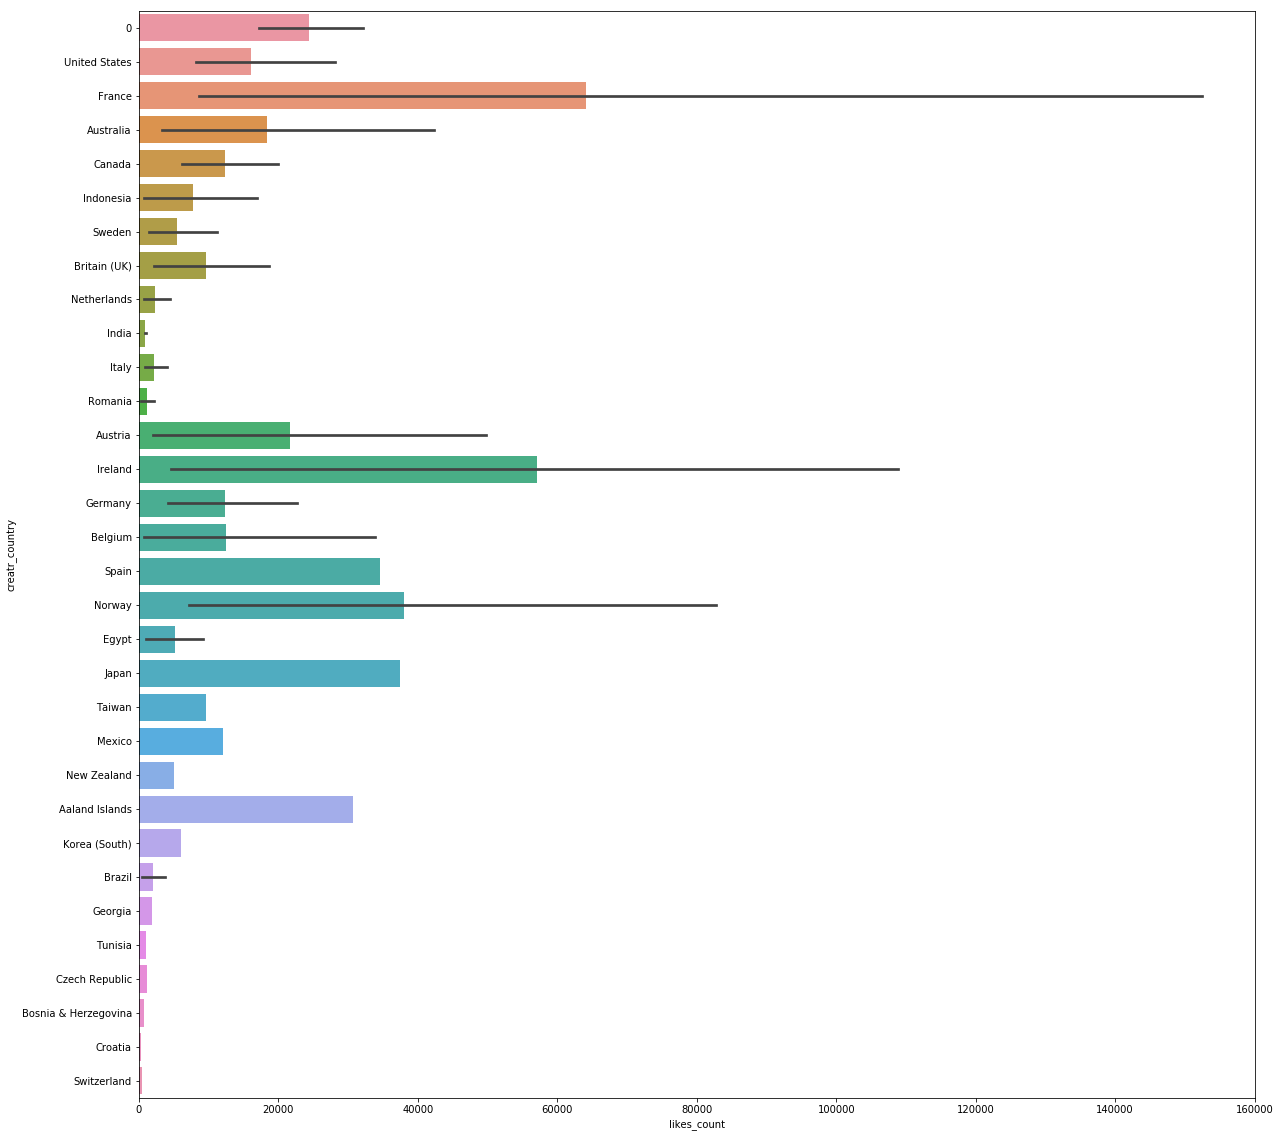

In [188]:
plt.figure(figsize=(20,20))
sns.barplot(data=Data,x='likes_count',y='creatr_country')
plt.show()

Here We see that the tracks created in countries like France and ireland tend o gather more likes than the tracks created in other countries.

Does the number of likes on the song depend on the followers the creater has?

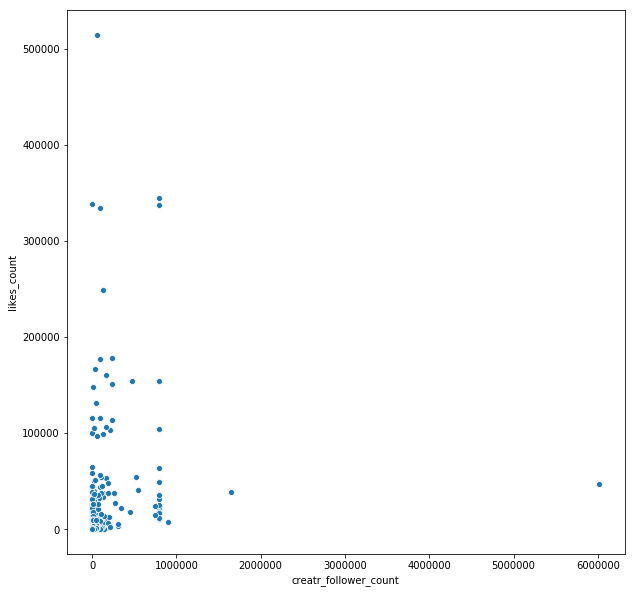

In [189]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=Data,y='likes_count',x='creatr_follower_count')
plt.show()

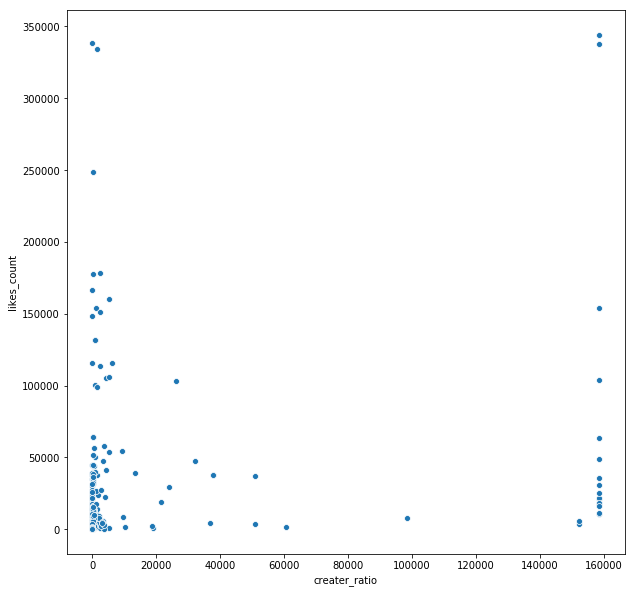

In [190]:
Data['creater_ratio']=Data['creatr_follower_count']/Data['creatr_following_count']
plt.figure(figsize=(10,10))
sns.scatterplot(data=Data,y='likes_count',x='creater_ratio')
plt.show()

Thus we see that number of followers of the creater do not have a great impact on the number of likes a song has

Let us assume that a person would download a song only if he likes it.<br>
Let's see if the number of downlads/playack ratio has any effect on the number of likes

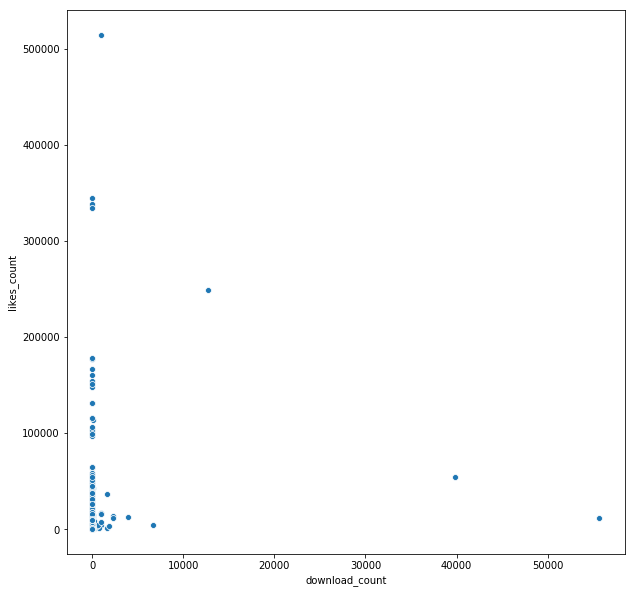

In [191]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=Data,y='likes_count',x='download_count')
plt.show()

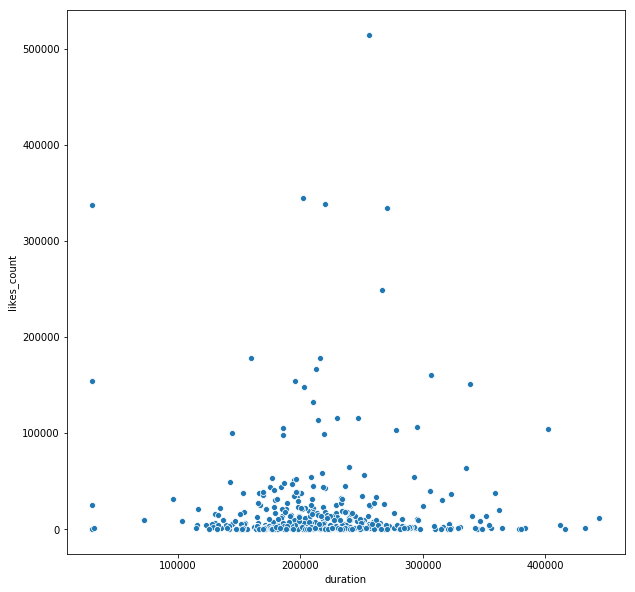

In [192]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=Data,y='likes_count',x='duration')
plt.show()

Wee see that the duration of the track or the nmber of downloads it has has no effect on the number of likes the song has

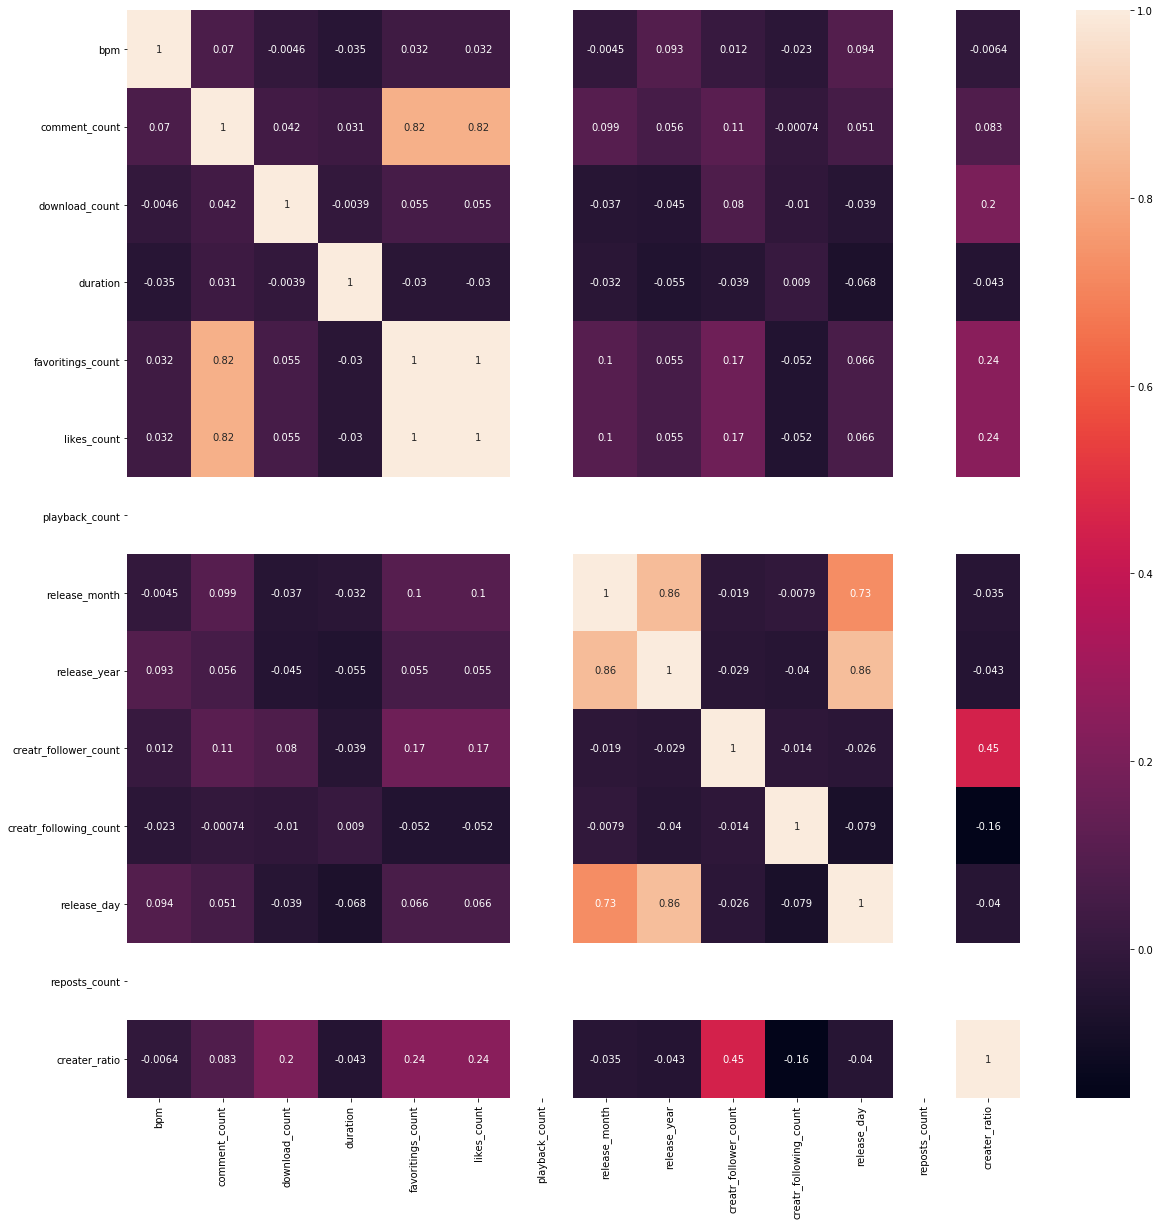

In [193]:
corr=Data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

From the above Heatmap we can also see that the number of likes and the number of comments on a song are highly correlated.

Let's See if the the followers a person has affect he country he belongs to?

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


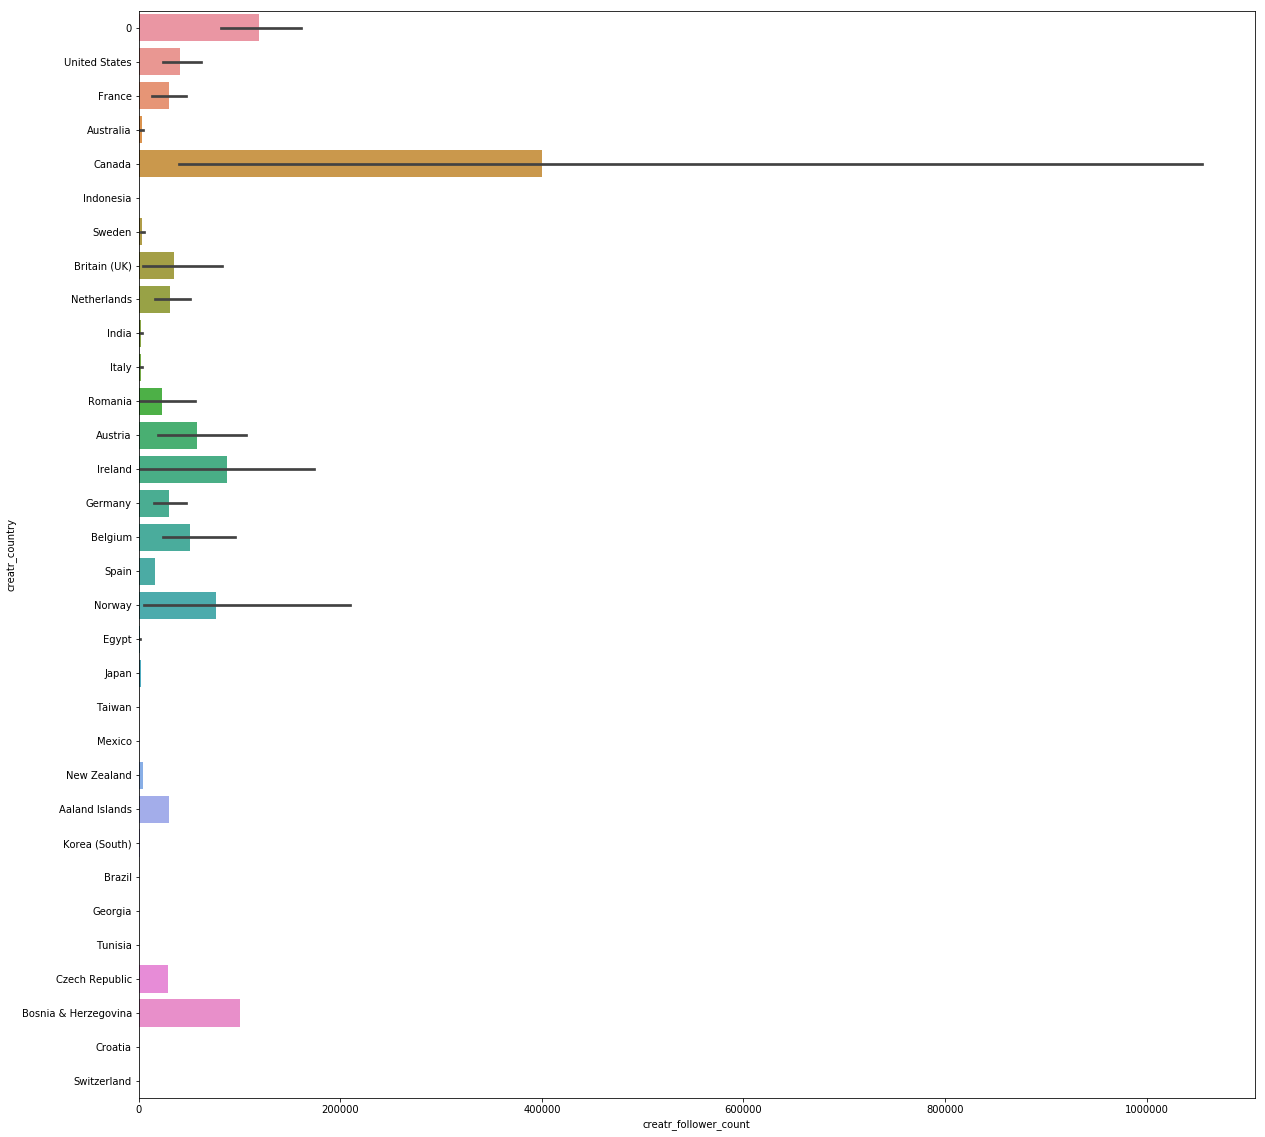

In [194]:
plt.figure(figsize=(20,20))
sns.barplot(data=Data,x='creatr_follower_count',y='creatr_country')
plt.show()

Here We see that the creaters from canada tend to havemore followers on soundcloud.

Does the Amount of time a song hasbeen on soundcloud affect the number of likes?

In [195]:
Data['Age']=2019-Data['release_year']

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


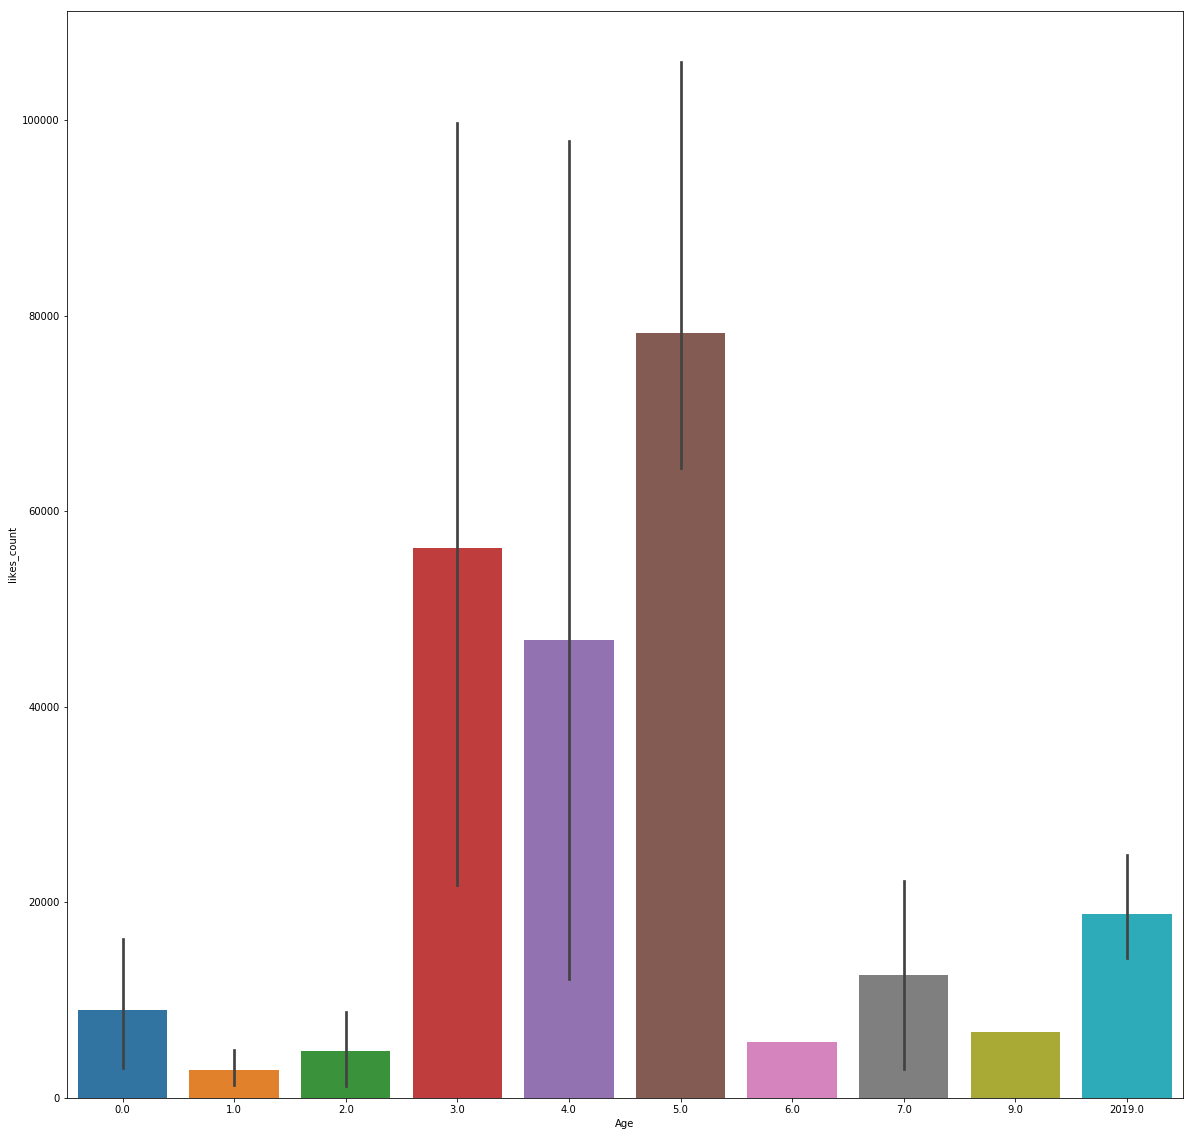

In [196]:
plt.figure(figsize=(20,20))
sns.barplot(data=Data,x='Age',y='likes_count')
plt.show()

Here we see  that the songs which have been on soundcloud for 3,4,5 years tend to have more likes than others. 

Does the month the song is created in has any affect on the number of lies ot has?

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


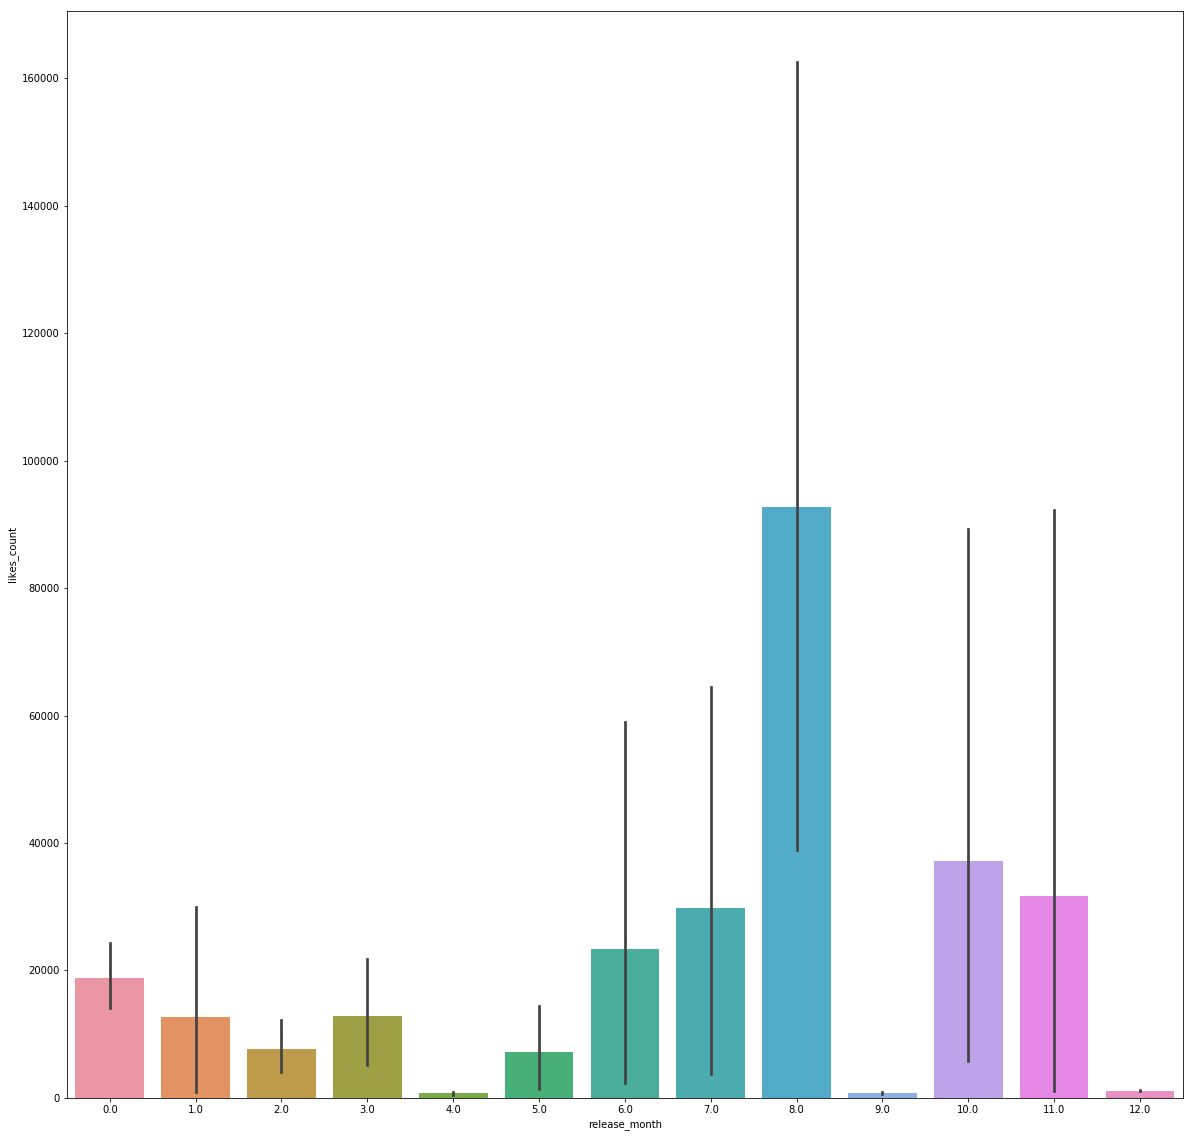

In [197]:
plt.figure(figsize=(20,20))
sns.barplot(data=Data,x='release_month',y='likes_count')
plt.show()

Here we see that the songs released in august tend to have more likes than songs released in other months.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


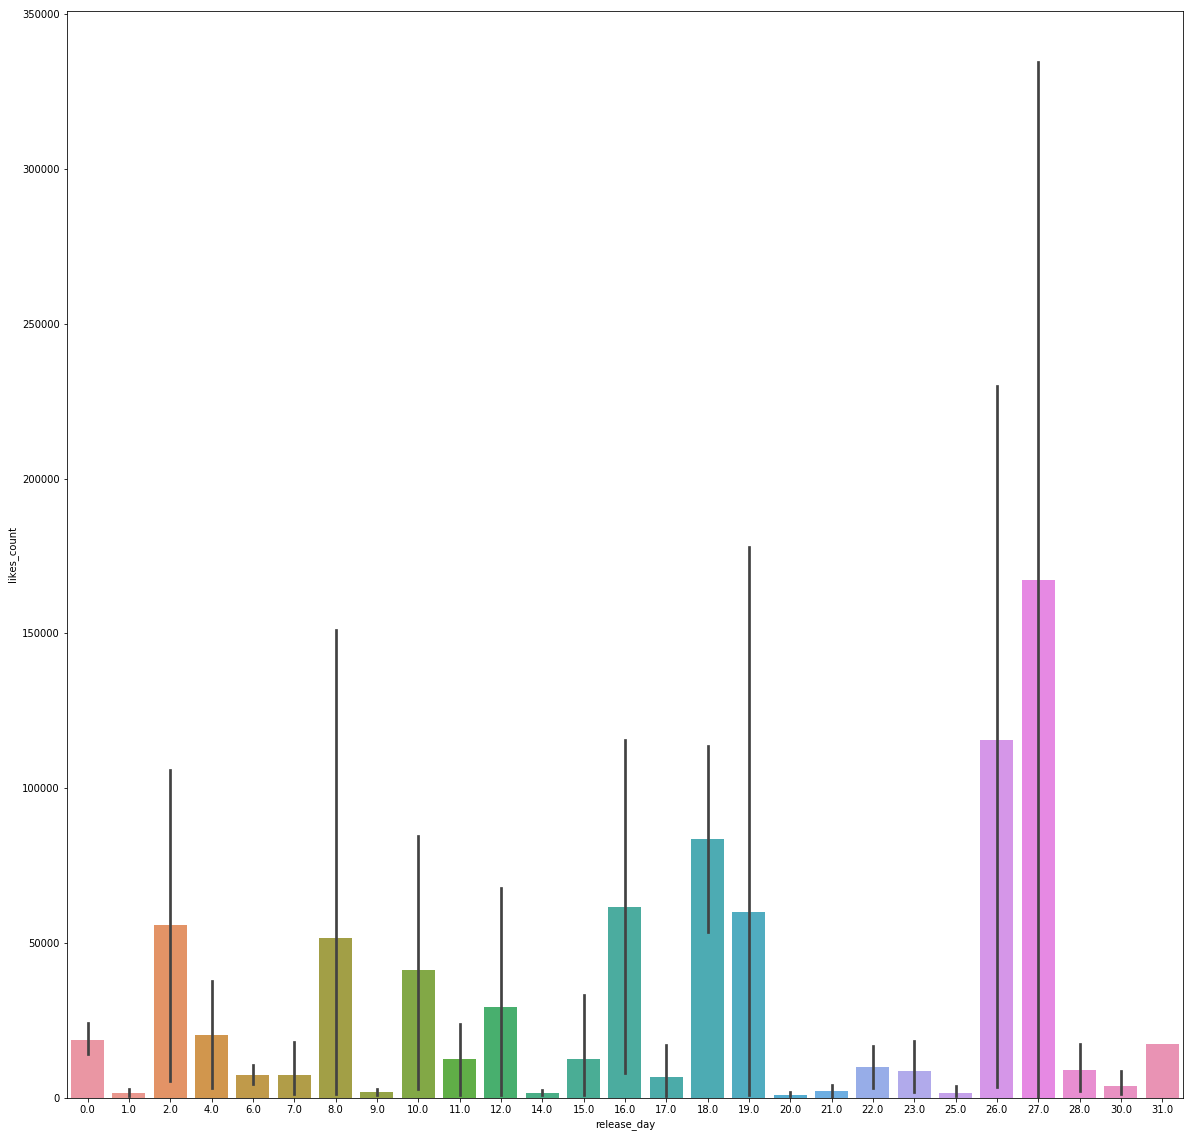

In [198]:
plt.figure(figsize=(20,20))
sns.barplot(data=Data,x='release_day',y='likes_count')
plt.show()

Here we also see that the songs released on the dates 26,25 tend to gather the most likes on Soundcloud.

## Conclusions

#### We have come to the following conclusions from the above data
<ol>
    <li>Most of the songs havea very few likes and comments(Likes and comments tend to follow Power-Law Distribution)</li>
    <li>Songs made in France and Ireland gather more likes in our specific dataset</li>
    <li>The Number of Likes and Number Of comments are highly correlated</li>
    <li>Canadian people tend to have ore followers on soundcloud</li>
    <li>Songs that have been on Soundcloud for 3,4 or 5 years have the most likes</li>
    <li>Songs released in August tend to have the most likes on SoundCloud</li>
    <li>Songs released on the dates like 25,26 tend to have more likes</li>
</ol>